<a href="https://colab.research.google.com/github/carrionalfredo/MLZC2022/blob/main/Leccion_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 16.63 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
from tensorflow.keras.preprocessing.image import load_img

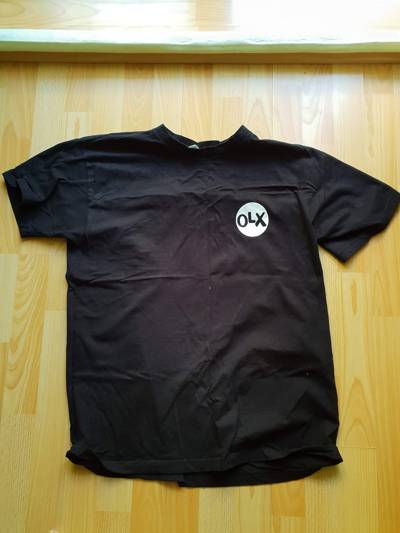

In [10]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [11]:
img=load_img(fullname, target_size=(299,299))

In [12]:
x = np.array(img)
x.shape

(299, 299, 3)

In [13]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

Pre-trained convolutional neural networks

In [14]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [15]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

91884032/91884032 [==============================] - 7s 0us/step


In [16]:
X = np.array([x])

In [17]:
X = preprocess_input(X)

In [18]:
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804]],

       [[ 0.47450984,  0.4039216 , -0.1372549 ],
        [ 0.4666667 ,  0.39607847, -0.14509803],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [19]:
pred = model.predict(X)

1/1 [==============================] - 8s 8s/step


In [20]:
decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.03960036),
  ('n04370456', 'sweatshirt', 0.035299573),
  ('n03710637', 'maillot', 0.01088412),
  ('n04525038', 'velvet', 0.0018057581)]]

Transfer learning

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [23]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150,150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [24]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [25]:
X, y = next(train_ds)

In [26]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [28]:
base_model= Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

base_model.trainable=False

83683744/83683744 [==============================] - 6s 0us/step


In [29]:
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training= False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model= keras.Model(inputs, outputs)

In [30]:
pred = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [31]:
pred[0]

array([ 0.18668376, -0.16748014, -0.493854  ,  0.04078412, -0.8694404 ,
       -0.2982021 , -1.4175234 , -0.32000208, -0.21292351, -0.0969854 ],
      dtype=float32)

In [32]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [33]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [34]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 19s 167ms/step - loss: 1.3214 - accuracy: 0.6679 - val_loss: 0.7800 - val_accuracy: 0.8065
Epoch 2/10
96/96 [==============================] - 14s 144ms/step - loss: 0.5206 - accuracy: 0.8344 - val_loss: 0.8365 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 14s 144ms/step - loss: 0.3686 - accuracy: 0.8745 - val_loss: 0.9113 - val_accuracy: 0.7947
Epoch 4/10
96/96 [==============================] - 14s 144ms/step - loss: 0.2927 - accuracy: 0.9012 - val_loss: 0.8567 - val_accuracy: 0.7918
Epoch 5/10
96/96 [==============================] - 15s 152ms/step - loss: 0.1589 - accuracy: 0.9475 - val_loss: 0.8514 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 14s 145ms/step - loss: 0.1124 - accuracy: 0.9583 - val_loss: 1.0467 - val_accuracy: 0.7859
Epoch 7/10
96/96 [==============================] - 14s 147ms/step - loss: 0.1025 - accuracy: 0.9648 - val_loss: 0.8164 - val_accuracy: 0.8094

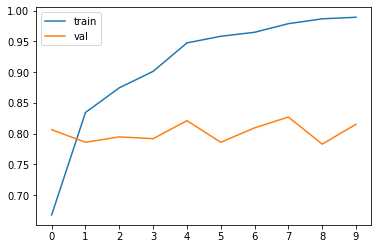

In [35]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))

plt.legend()

Adjusting the learning rate

In [36]:
def make_model(learning_rate = 0.01):
    base_model= Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable=False

    ################################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    outputs = keras.layers.Dense(10)(vectors)

    model= keras.Model(inputs, outputs)
    
    ################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 17s 155ms/step - loss: 1.9575 - accuracy: 0.3468 - val_loss: 1.6343 - val_accuracy: 0.4692
Epoch 2/10
96/96 [==============================] - 14s 145ms/step - loss: 1.4113 - accuracy: 0.5538 - val_loss: 1.2763 - val_accuracy: 0.5806
Epoch 3/10
96/96 [==============================] - 14s 144ms/step - loss: 1.1612 - accuracy: 0.6307 - val_loss: 1.0902 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 15s 151ms/step - loss: 1.0161 - accuracy: 0.6744 - val_loss: 0.9726 - val_accuracy: 0.7097
Epoch 5/10
96/96 [==============================] - 14s 142ms/step - loss: 0.9207 - accuracy: 0.7063 - val_loss: 0.9009 - val_accuracy: 0.7185
Epoch 6/10
96/96 [==============================] - 14s 141ms/step - loss: 0.8496 - accuracy: 0.7226 - val_loss: 0.8490 - val_accuracy: 0.7419
Epoch 7/10
96/96 [==============================] - 14s 142ms/step - loss: 0.7966 - accuracy: 0.7399 - val_loss: 0.8063 - val_accuracy:

In [38]:
del scores[0.1]
del scores[0.0001]

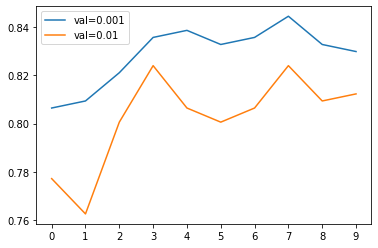

In [39]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))
    
plt.xticks(np.arange(10))
plt.legend()

In [40]:
learning_rate = 0.01

Checkpointin

In [41]:
model.save_weights('model_v1.h5', save_format='h5')

In [42]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [43]:
model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 17s 156ms/step - loss: 1.3338 - accuracy: 0.6701 - val_loss: 0.7781 - val_accuracy: 0.7947
Epoch 2/10
96/96 [==============================] - 14s 143ms/step - loss: 0.5295 - accuracy: 0.8250 - val_loss: 0.8599 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 14s 146ms/step - loss: 0.3519 - accuracy: 0.8836 - val_loss: 0.7697 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 14s 141ms/step - loss: 0.3211 - accuracy: 0.8918 - val_loss: 0.9762 - val_accuracy: 0.7771
Epoch 5/10
96/96 [==============================] - 14s 142ms/step - loss: 0.1802 - accuracy: 0.9371 - val_loss: 1.0298 - val_accuracy: 0.7859
Epoch 6/10
96/96 [==============================] - 14s 143ms/step - loss: 0.1342 - accuracy: 0.9511 - val_loss: 0.9452 - val_accuracy: 0.7830
Epoch 7/10
96/96 [==============================] - 15s 151ms/step - loss: 0.0816 - accuracy: 0.9713 - val_loss: 0.9385 - val_accuracy: 0.8006

In [44]:
!ls

clothing-dataset-small	sample_data		 xception_v1_03_0.809.h5
model_v1.h5		xception_v1_01_0.795.h5  xception_v1_08_0.827.h5


Adding more layers

In [45]:
def make_model(learning_rate = 0.01, size_inner=100):
    base_model= Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable=False

    ################################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model= keras.Model(inputs, outputs)
    
    ################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [46]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 10000]:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner = size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 17s 150ms/step - loss: 1.4754 - accuracy: 0.4772 - val_loss: 1.1527 - val_accuracy: 0.6276
Epoch 2/10
96/96 [==============================] - 14s 141ms/step - loss: 0.9011 - accuracy: 0.7184 - val_loss: 0.8413 - val_accuracy: 0.7390
Epoch 3/10
96/96 [==============================] - 14s 144ms/step - loss: 0.6852 - accuracy: 0.7784 - val_loss: 0.7883 - val_accuracy: 0.7566
Epoch 4/10
96/96 [==============================] - 14s 141ms/step - loss: 0.5853 - accuracy: 0.8031 - val_loss: 0.6927 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 14s 141ms/step - loss: 0.4977 - accuracy: 0.8416 - val_loss: 0.6837 - val_accuracy: 0.7771
Epoch 6/10
96/96 [==============================] - 15s 152ms/step - loss: 0.4380 - accuracy: 0.8605 - val_loss: 0.6395 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 14s 141ms/step - loss: 0.3920 - accuracy: 0.8820 - val_loss: 0.6396 - val_accuracy: 0.7

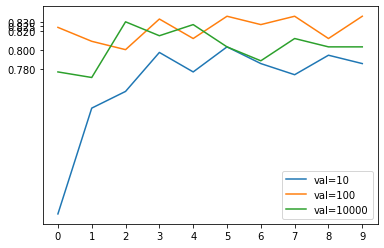

In [48]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
    
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.8, 0.82, 0.825, 0.83])
plt.legend()

Regularization

In [49]:
def make_model(learning_rate = 0.01, size_inner=100, droprate=0.5):
    base_model= Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )

    base_model.trainable=False

    ################################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model= keras.Model(inputs, outputs)
    
    ################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [50]:
learning_rate = 0.001
size=100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)
    
    model = make_model(
        learning_rate=learning_rate,
        size_inner = size,
        droprate=droprate
    )
    
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 17s 152ms/step - loss: 0.9761 - accuracy: 0.6659 - val_loss: 0.6612 - val_accuracy: 0.7742
Epoch 2/30
96/96 [==============================] - 14s 144ms/step - loss: 0.5053 - accuracy: 0.8237 - val_loss: 0.6387 - val_accuracy: 0.7713
Epoch 3/30
96/96 [==============================] - 14s 144ms/step - loss: 0.3731 - accuracy: 0.8703 - val_loss: 0.6161 - val_accuracy: 0.7918
Epoch 4/30
96/96 [==============================] - 14s 143ms/step - loss: 0.2560 - accuracy: 0.9205 - val_loss: 0.6006 - val_accuracy: 0.7947
Epoch 5/30
96/96 [==============================] - 15s 153ms/step - loss: 0.1805 - accuracy: 0.9514 - val_loss: 0.6096 - val_accuracy: 0.8152
Epoch 6/30
96/96 [==============================] - 14s 144ms/step - loss: 0.1287 - accuracy: 0.9707 - val_loss: 0.6322 - val_accuracy: 0.7977
Epoch 7/30
96/96 [==============================] - 15s 159ms/step - loss: 0.0960 - accuracy: 0.9817 - val_loss: 0.6180 - val_accuracy: 0.

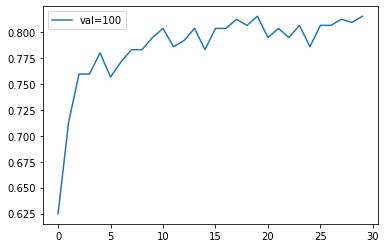

In [51]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

In [53]:
droprate = 0.2

Data Augmentation

In [54]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True    
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150,150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [55]:
learning_rate = 0.001
size=100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 31s 295ms/step - loss: 1.2752 - accuracy: 0.5821 - val_loss: 0.7405 - val_accuracy: 0.7625
Epoch 2/50
96/96 [==============================] - 28s 296ms/step - loss: 0.8922 - accuracy: 0.6975 - val_loss: 0.6847 - val_accuracy: 0.7537
Epoch 3/50
96/96 [==============================] - 27s 284ms/step - loss: 0.7696 - accuracy: 0.7422 - val_loss: 0.6634 - val_accuracy: 0.7713
Epoch 4/50
96/96 [==============================] - 28s 288ms/step - loss: 0.6789 - accuracy: 0.7689 - val_loss: 0.6043 - val_accuracy: 0.7947
Epoch 5/50
96/96 [==============================] - 27s 284ms/step - loss: 0.6564 - accuracy: 0.7784 - val_loss: 0.6377 - val_accuracy: 0.7801
Epoch 6/50
96/96 [==============================] - 28s 294ms/step - loss: 0.5928 - accuracy: 0.7966 - val_loss: 0.5785 - val_accuracy: 0.8094
Epoch 7/50
96/96 [==============================] - 27s 284ms/step - loss: 0.5612 - accuracy: 0.7999 - val_loss: 0.5902 - val_accuracy: 0.8094

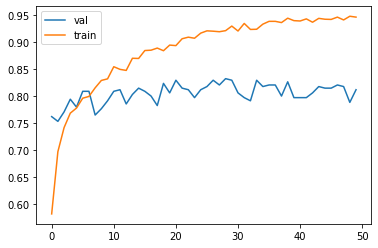

In [56]:
hist=history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

Training a larger model

In [57]:
def make_model(input_size=150, learning_rate = 0.01, size_inner=100, droprate=0.5):
    base_model= Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size,input_size,3)
    )

    base_model.trainable=False

    ################################################
    
    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model= keras.Model(inputs, outputs)
    
    ################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [58]:
input_size=299

In [59]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True,   
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size,input_size),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/',
    target_size=(input_size,input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [60]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [61]:
learning_rate = 0.0005
size=100
droprate = 0.2

model = make_model(
    input_size=299,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 75s 741ms/step - loss: 0.9630 - accuracy: 0.6943 - val_loss: 0.5311 - val_accuracy: 0.8358
Epoch 2/50
96/96 [==============================] - 68s 711ms/step - loss: 0.5117 - accuracy: 0.8282 - val_loss: 0.4520 - val_accuracy: 0.8358
Epoch 3/50
96/96 [==============================] - 69s 719ms/step - loss: 0.4250 - accuracy: 0.8579 - val_loss: 0.3926 - val_accuracy: 0.8563
Epoch 4/50
96/96 [==============================] - 70s 724ms/step - loss: 0.3739 - accuracy: 0.8735 - val_loss: 0.3867 - val_accuracy: 0.8680
Epoch 5/50
96/96 [==============================] - 70s 722ms/step - loss: 0.3416 - accuracy: 0.8853 - val_loss: 0.3717 - val_accuracy: 0.8651
Epoch 6/50
96/96 [==============================] - 69s 715ms/step - loss: 0.3065 - accuracy: 0.8970 - val_loss: 0.3674 - val_accuracy: 0.8680
Epoch 7/50
96/96 [==============================] - 69s 715ms/step - loss: 0.2886 - accuracy: 0.9016 - val_loss: 0.3551 - val_accuracy: 0.8798

In [62]:
!ls

clothing-dataset-small	 xception_v1_03_0.809.h5  xception_v4_04_0.868.h5
model_v1.h5		 xception_v1_08_0.827.h5  xception_v4_07_0.880.h5
sample_data		 xception_v4_01_0.836.h5  xception_v4_12_0.886.h5
xception_v1_01_0.795.h5  xception_v4_03_0.856.h5  xception_v4_13_0.903.h5


Using the model

In [63]:
import tensorflow as tf
from tensorflow import keras

In [65]:
model = keras.models.load_model('xception_v4_13_0.903.h5')

In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [70]:
test_gen=ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(299,299),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [71]:
model.evaluate(test_ds)

11/11 [==============================] - 3s 220ms/step - loss: 0.3370 - accuracy: 0.9032


[0.33700233697891235, 0.9032257795333862]

In [72]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [75]:
img = load_img(path, target_size=(299,299))

In [76]:
import numpy as np

In [77]:
x = np.array(img)
x = np.array([x])
x.shape

(1, 299, 299, 3)

In [78]:
x = preprocess_input(x)

In [79]:
pred = model.predict(x)

1/1 [==============================] - 1s 687ms/step


In [80]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
    ]

In [81]:
dict(zip(classes, pred[0]))

{'dress': -1.5444033,
 'hat': -4.3115344,
 'longsleeve': -0.406875,
 'outwear': -1.4331968,
 'pants': 11.058019,
 'shirt': -1.2927328,
 'shoes': -2.491163,
 'shorts': 5.661776,
 'skirt': -4.1808977,
 't-shirt': -0.3928153}